In [142]:
# Importing required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [143]:
# Loading the dataset

df = pd.read_csv(r"C:\Users\shubh\Downloads\aqi_dataset\city_day.csv")

In [144]:
# Inspecting the dataset

print(df.head())
print(df.info())
print(df.describe())

        city      date  PM2.5  PM10  AQI AQI_Bucket
0  Ahmedabad  01-01-15    NaN   NaN  NaN        NaN
1  Ahmedabad  02-01-15    NaN   NaN  NaN        NaN
2  Ahmedabad  03-01-15    NaN   NaN  NaN        NaN
3  Ahmedabad  04-01-15    NaN   NaN  NaN        NaN
4  Ahmedabad  05-01-15    NaN   NaN  NaN        NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        29531 non-null  object 
 1   date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   AQI         24850 non-null  float64
 5   AQI_Bucket  24850 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.4+ MB
None
              PM2.5          PM10           AQI
count  24933.000000  18391.000000  24850.000000
mean      67.450578    118.127103    166.463581
std       64.661449     90.605110    140.696585
min

In [145]:
# Cleaning dataset (Missing Values)

df[['PM2.5', 'PM10', 'AQI']] = df[['PM2.5', 'PM10', 'AQI']].fillna(df[['PM2.5', 'PM10', 'AQI']].mean())

In [146]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%y')

In [147]:
print(df['AQI_Bucket'].value_counts())  # Shows frequency of each category

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64


In [148]:
print(df.columns)

Index(['city', 'date', 'PM2.5', 'PM10', 'AQI', 'AQI_Bucket'], dtype='object')


In [149]:
print(df.head())

        city       date      PM2.5        PM10         AQI AQI_Bucket
0  Ahmedabad 2015-01-01  67.450578  118.127103  166.463581        NaN
1  Ahmedabad 2015-01-02  67.450578  118.127103  166.463581        NaN
2  Ahmedabad 2015-01-03  67.450578  118.127103  166.463581        NaN
3  Ahmedabad 2015-01-04  67.450578  118.127103  166.463581        NaN
4  Ahmedabad 2015-01-05  67.450578  118.127103  166.463581        NaN


In [150]:
# Top cities with Highest Pollution Levels

df_average_pollution = df.groupby('city')['AQI'].mean().reset_index()
top_10_polluted_cities = df_average_pollution.sort_values(by='AQI', ascending=False).head(10)

In [151]:
print(top_10_polluted_cities)

            city         AQI
0      Ahmedabad  356.144807
10         Delhi  259.024707
21         Patna  224.822373
12      Gurugram  217.227975
19       Lucknow  214.998893
23       Talcher  171.310522
16    Jorapokhar  161.707019
6   Brajrajnagar  154.162373
20        Mumbai  142.889029
18       Kolkata  142.475203


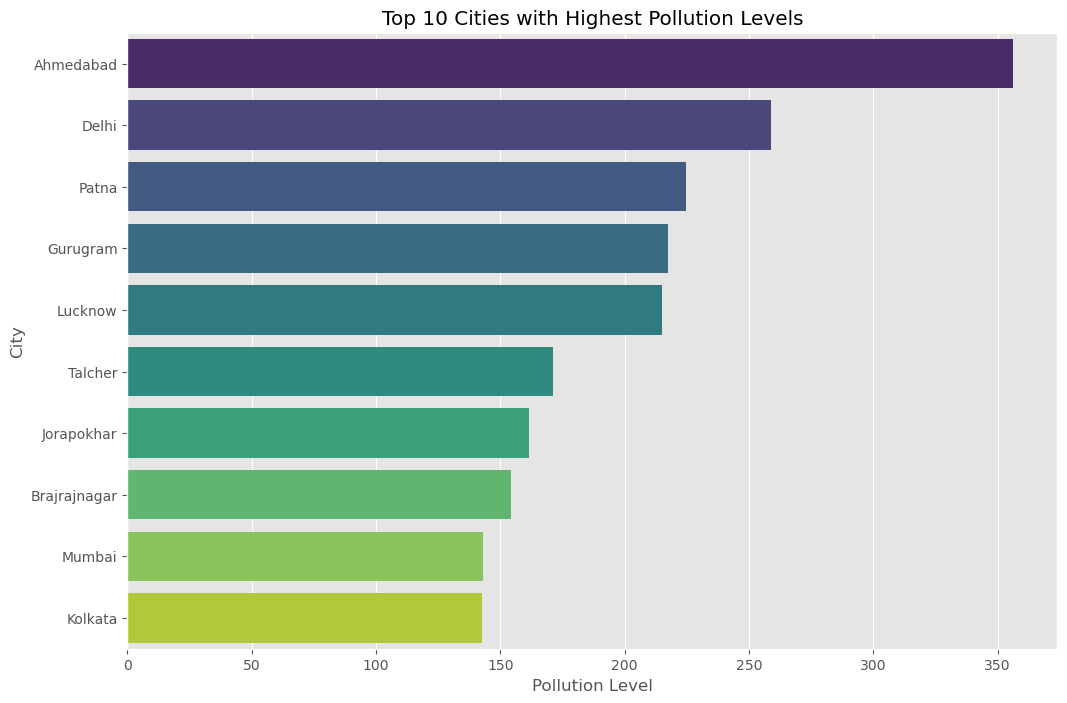

In [152]:
# Visualise Top 10 cities with highest pollution levels
plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, x='AQI', y='city', palette='viridis')
plt.title('Top 10 Cities with Highest Pollution Levels')
plt.xlabel('Pollution Level')
plt.ylabel('City')
plt.show()

In [153]:
#Sorting date in asec order

df = df.sort_values(by='date')

# Calculating the diff in AQI
df['AQI_Diff'] = df.groupby('city')['AQI'].diff()
df = df.iloc[1:]
avg_increase_pollution = df.groupby('city')['AQI_Diff'].mean().reset_index()
city_highest_avg_increase = avg_increase_pollution.sort_values(by='AQI_Diff', ascending=False).head(10)


In [154]:
print(city_highest_avg_increase)


            city  AQI_Diff
6   Brajrajnagar  0.000000
9     Coimbatore  0.000000
12      Gurugram -0.005640
0      Ahmedabad -0.023637
21         Patna -0.036868
8        Chennai -0.037083
19       Lucknow -0.045052
20        Mumbai -0.056506
14     Hyderabad -0.059084
4      Bengaluru -0.061486


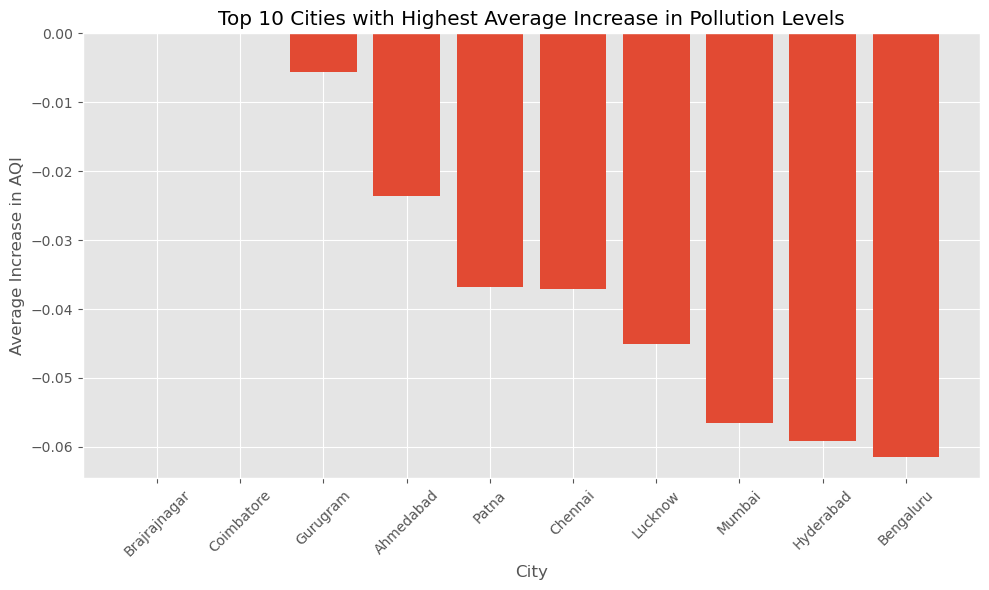

In [155]:
# bar chart to visualize the Top 10 Cities with Highest Increase in Pollution Levels (average)

plt.figure(figsize=(10, 6))
plt.bar(city_highest_avg_increase['city'], city_highest_avg_increase['AQI_Diff'])
plt.title('Top 10 Cities with Highest Average Increase in Pollution Levels')
plt.xlabel('City')
plt.ylabel('Average Increase in AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
# Top 5 months with highest AQI in Delhi, Mumbai, Kolkata, Chennai, Bengaluru

# Filter data for Delhi
delhi_data = df[df['city'] == 'Delhi']

# Extract month from 'date' column
delhi_data['month'] = delhi_data['date'].dt.month_name()

# Calculate average AQI by month
avg_pollution_month = delhi_data.groupby('month')['AQI'].mean().reset_index()

# Sort by AQI in descending order
top_5_polluted_months = avg_pollution_month.sort_values(by='AQI', ascending=False).head(5)

month_labels = top_5_polluted_months['month'].tolist()
avg_pollution_values = top_5_polluted_months['AQI'].tolist()

print("Top 5 Months with Highest Average Pollution Levels (Delhi):")
for i, month in enumerate(month_labels):
  print(f"{i+1}. {month}: {avg_pollution_values[i]}")


Top 5 Months with Highest Average Pollution Levels (Delhi):
1. November: 401.9533333333333
2. December: 371.2064516129032
3. January: 360.38709677419354
4. October: 312.3290322580645
5. February: 298.82941176470587


C:\Users\shubh\AppData\Local\Temp\ipykernel_25532\2083662625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['month'] = delhi_data['date'].dt.month_name()


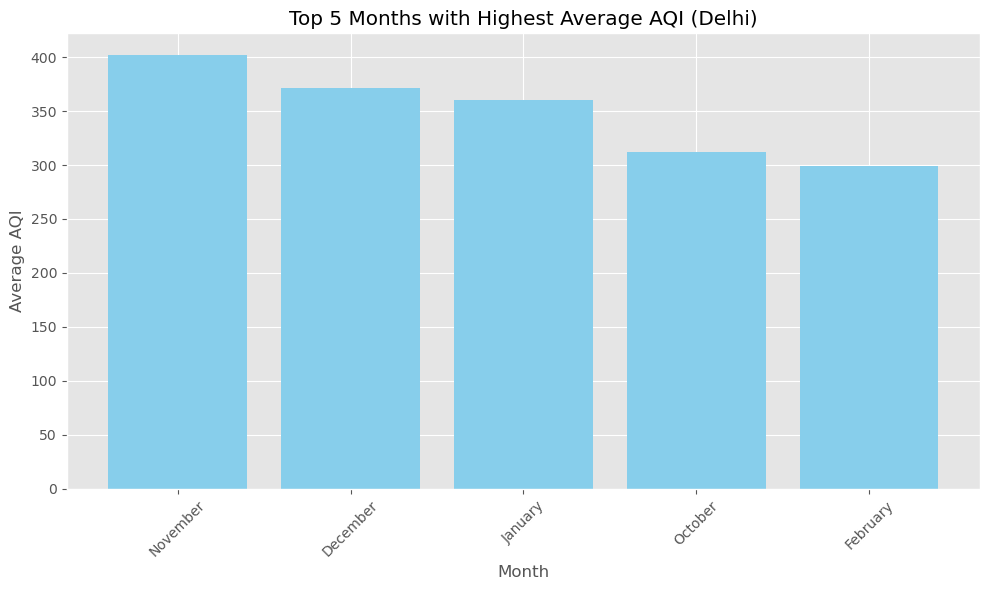

In [157]:
# Create a bar chart

plt.figure(figsize=(10, 6))
plt.bar(month_labels, avg_pollution_values, color='skyblue')
plt.title('Top 5 Months with Highest Average AQI (Delhi)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [158]:


# Filter data for Mumbai
mumbai_data = df[df['city'] == 'Mumbai']

# Extract month from 'date' column
mumbai_data['month'] = mumbai_data['date'].dt.month_name()

# Calculate average AQI by month
avg_pollution_month = mumbai_data.groupby('month')['AQI'].mean().reset_index()

# Sort by AQI in descending order
top_5_polluted_months = avg_pollution_month.sort_values(by='AQI', ascending=False).head(5)

month_labels = top_5_polluted_months['month'].tolist()
avg_pollution_values = top_5_polluted_months['AQI'].tolist()

print("Top 5 Months with Highest Average Pollution Levels (Mumbai):")
for i, month in enumerate(month_labels):
  print(f"{i+1}. {month}: {avg_pollution_values[i]}")


Top 5 Months with Highest Average Pollution Levels (Mumbai):
1. December: 166.94266502239242
2. January: 166.6692693797192
3. February: 162.4846159308794
4. November: 158.5105110663984
5. March: 148.9972263689665


C:\Users\shubh\AppData\Local\Temp\ipykernel_25532\549785745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_data['month'] = mumbai_data['date'].dt.month_name()


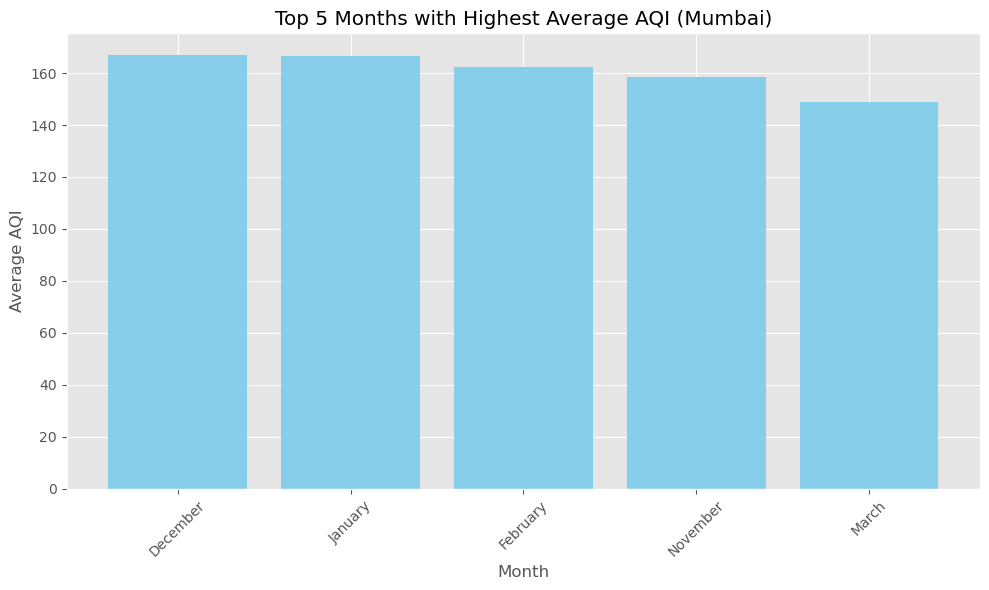

In [159]:
# Create a bar chart

plt.figure(figsize=(10, 6))
plt.bar(month_labels, avg_pollution_values, color='skyblue')
plt.title('Top 5 Months with Highest Average AQI (Mumbai)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [160]:

# Filter data for Kolkata
kolkata_data = df[df['city'] == 'Kolkata']

# Extract month from 'date' column
kolkata_data['month'] = kolkata_data['date'].dt.month_name()

# Calculate average AQI by month
avg_pollution_month = kolkata_data.groupby('month')['AQI'].mean().reset_index()

# Sort by AQI in descending order
top_5_polluted_months = avg_pollution_month.sort_values(by='AQI', ascending=False).head(5)

month_labels = top_5_polluted_months['month'].tolist()
avg_pollution_values = top_5_polluted_months['AQI'].tolist()

print("Top 5 Months with Highest Average Pollution Levels (Kollkata):")
for i, month in enumerate(month_labels):
  print(f"{i+1}. {month}: {avg_pollution_values[i]}")

Top 5 Months with Highest Average Pollution Levels (Kollkata):
1. January: 288.88709677419354
2. December: 273.5806451612903
3. November: 244.3
4. February: 231.2982456140351
5. October: 144.29032258064515


C:\Users\shubh\AppData\Local\Temp\ipykernel_25532\2330152983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kolkata_data['month'] = kolkata_data['date'].dt.month_name()


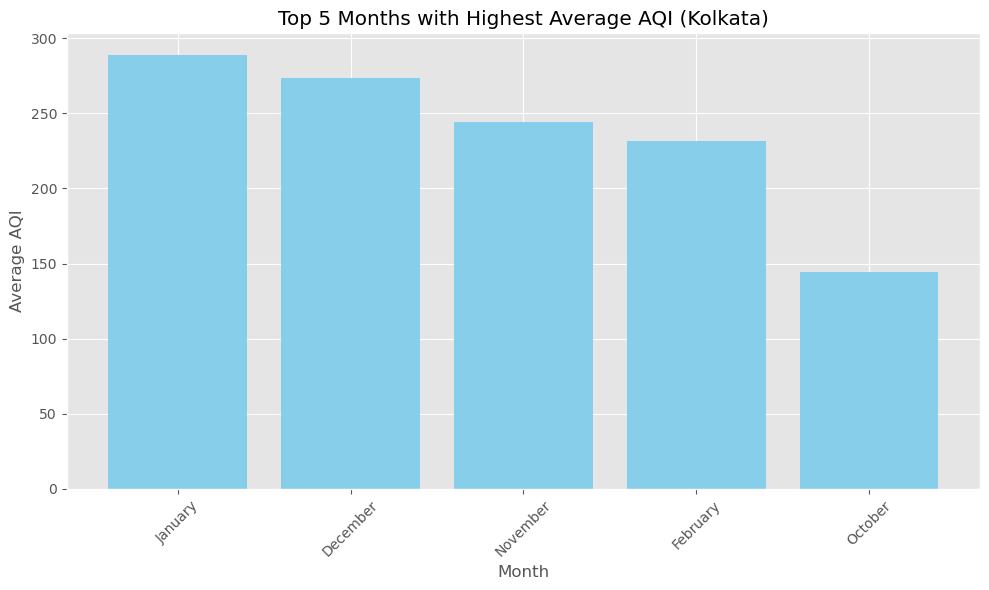

In [161]:
# Create a bar chart

plt.figure(figsize=(10, 6))
plt.bar(month_labels, avg_pollution_values, color='skyblue')
plt.title('Top 5 Months with Highest Average AQI (Kolkata)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [162]:

# Filter data for Chennai
chennai_data = df[df['city'] == 'Chennai']

# Extract month from 'date' column
chennai_data['month'] = chennai_data['date'].dt.month_name()

# Calculate average AQI by month
avg_pollution_month = chennai_data.groupby('month')['AQI'].mean().reset_index()

# Sort by AQI in descending order
top_5_polluted_months = avg_pollution_month.sort_values(by='AQI', ascending=False).head(5)

month_labels = top_5_polluted_months['month'].tolist()
avg_pollution_values = top_5_polluted_months['AQI'].tolist()

print("Top 5 Months with Highest Average Pollution Levels (Chennai):")
for i, month in enumerate(month_labels):
  print(f"{i+1}. {month}: {avg_pollution_values[i]}")

Top 5 Months with Highest Average Pollution Levels (Chennai):
1. January: 134.4912420761126
2. February: 125.65870753935378
3. March: 124.07555440167889
4. October: 121.2804102031544
5. December: 119.18239761147531


C:\Users\shubh\AppData\Local\Temp\ipykernel_25532\3268845058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chennai_data['month'] = chennai_data['date'].dt.month_name()


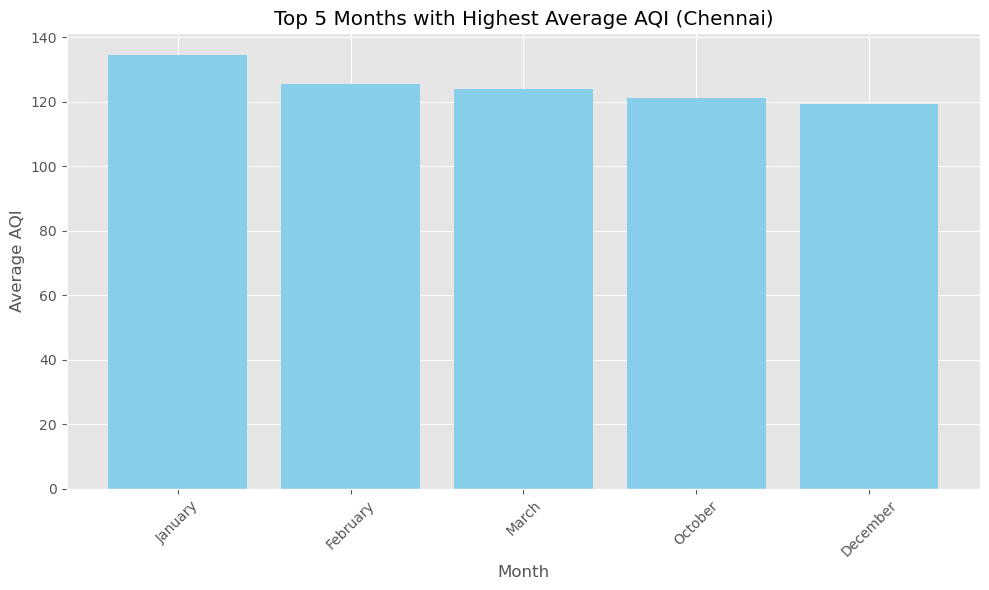

In [163]:
# Create a bar chart

plt.figure(figsize=(10, 6))
plt.bar(month_labels, avg_pollution_values, color='skyblue')
plt.title('Top 5 Months with Highest Average AQI (Chennai)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [164]:

# Filter data for Bengaluru
blr_data = df[df['city'] == 'Kolkata']

# Extract month from 'date' column
blr_data['month'] = blr_data['date'].dt.month_name()

# Calculate average AQI by month
avg_pollution_month = blr_data.groupby('month')['AQI'].mean().reset_index()

# Sort by AQI in descending order
top_5_polluted_months = avg_pollution_month.sort_values(by='AQI', ascending=False).head(5)

month_labels = top_5_polluted_months['month'].tolist()
avg_pollution_values = top_5_polluted_months['AQI'].tolist()

print("Top 5 Months with Highest Average Pollution Levels (Bengaluru):")
for i, month in enumerate(month_labels):
  print(f"{i+1}. {month}: {avg_pollution_values[i]}")

Top 5 Months with Highest Average Pollution Levels (Bengaluru):
1. January: 288.88709677419354
2. December: 273.5806451612903
3. November: 244.3
4. February: 231.2982456140351
5. October: 144.29032258064515


C:\Users\shubh\AppData\Local\Temp\ipykernel_25532\822523974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blr_data['month'] = blr_data['date'].dt.month_name()


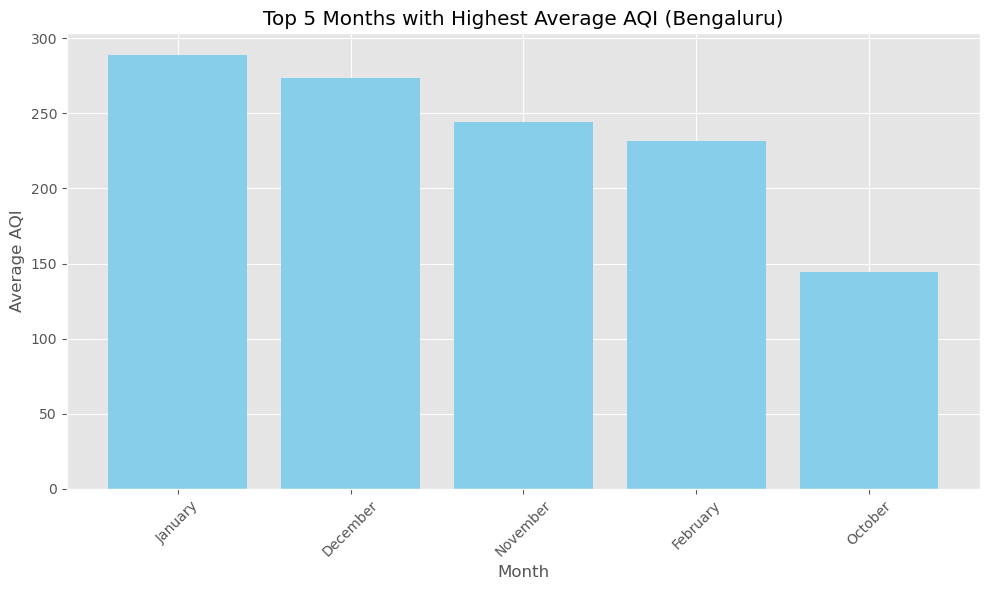

In [165]:
# Create a bar chart

plt.figure(figsize=(10, 6))
plt.bar(month_labels, avg_pollution_values, color='skyblue')
plt.title('Top 5 Months with Highest Average AQI (Bengaluru)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [166]:

# Filter data for Bhopal
bpl_data = df[df['city'] == 'Bhopal']

# Extract month from 'date' column
bpl_data['month'] = bpl_data['date'].dt.month_name()

# Calculate average AQI by month
avg_pollution_month = bpl_data.groupby('month')['AQI'].mean().reset_index()

# Sort by AQI in descending order
top_5_polluted_months = avg_pollution_month.sort_values(by='AQI', ascending=False).head(5)

month_labels = top_5_polluted_months['month'].tolist()
avg_pollution_values = top_5_polluted_months['AQI'].tolist()

print("Top 5 Months with Highest Average Pollution Levels (Bhopal):")
for i, month in enumerate(month_labels):
  print(f"{i+1}. {month}: {avg_pollution_values[i]}")

Top 5 Months with Highest Average Pollution Levels (Bhopal):
1. November: 205.6
2. December: 185.51612903225808
3. January: 160.51612903225808
4. October: 135.32258064516128
5. February: 128.6206896551724


C:\Users\shubh\AppData\Local\Temp\ipykernel_25532\2053457351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpl_data['month'] = bpl_data['date'].dt.month_name()


Descriptive Statistics:
              PM2.5          PM10           AQI
count  29530.000000  29530.000000  29530.000000
mean      67.450578    118.127103    166.463581
std       59.415482     71.502164    129.066533
min        0.040000      0.010000     13.000000
25%       32.150000     79.312500     88.000000
50%       58.030000    118.127103    138.000000
75%       72.450000    118.127103    179.000000
max      949.990000   1000.000000   2049.000000

Correlation Matrix:
          PM2.5      PM10       AQI
PM2.5  1.000000  0.558079  0.628860
PM10   0.558079  1.000000  0.484497
AQI    0.628860  0.484497  1.000000


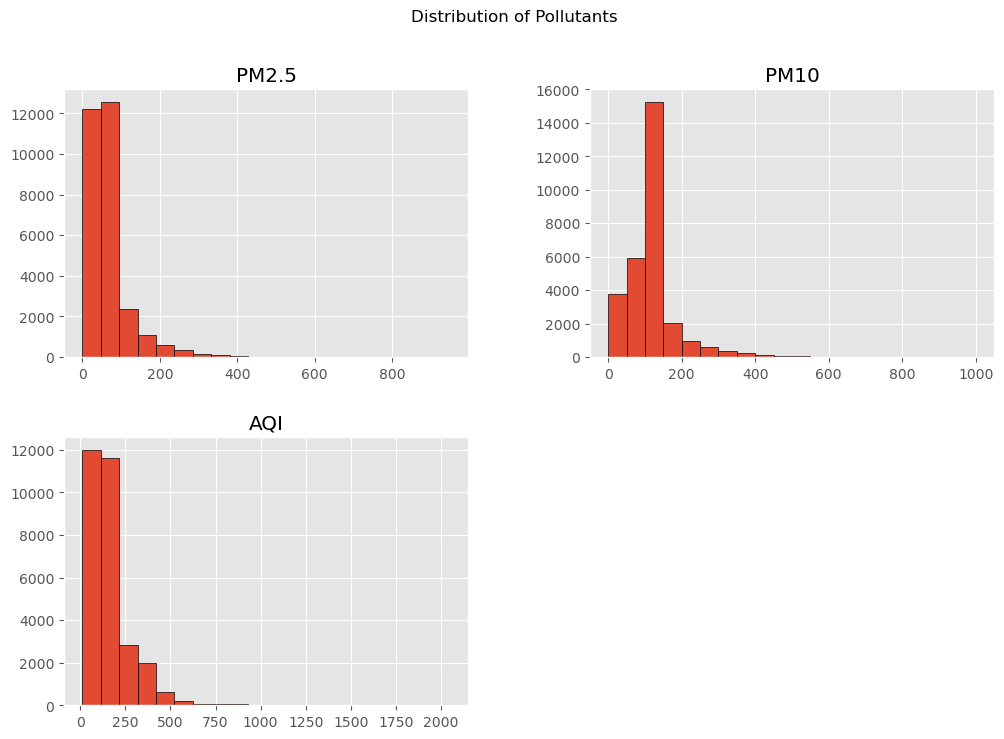

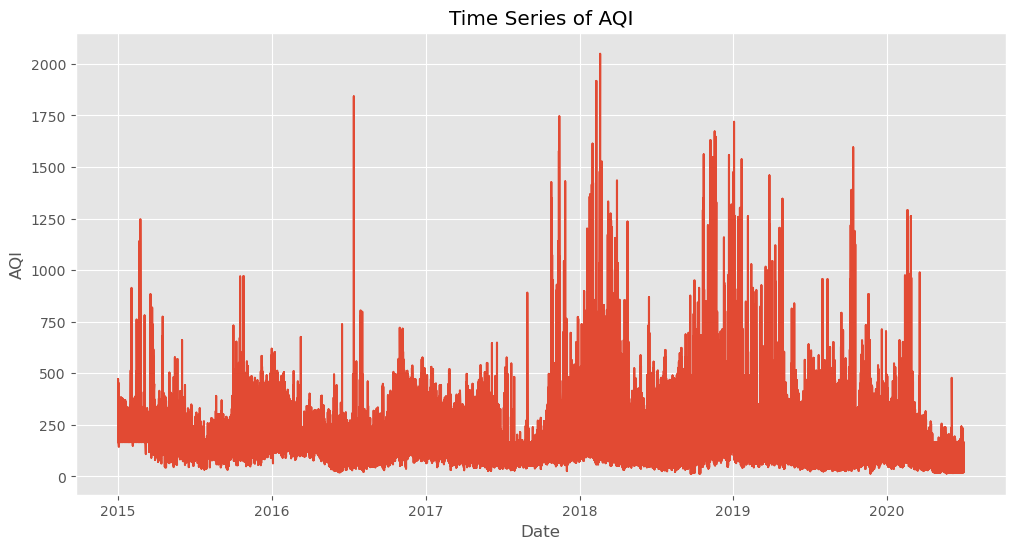

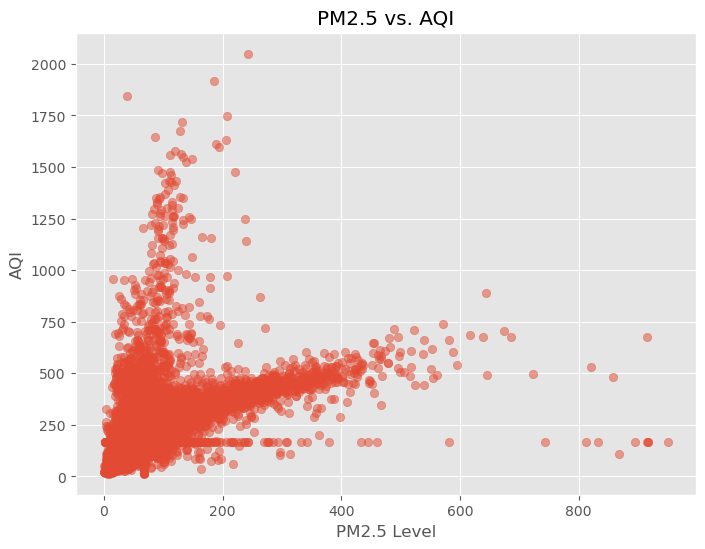

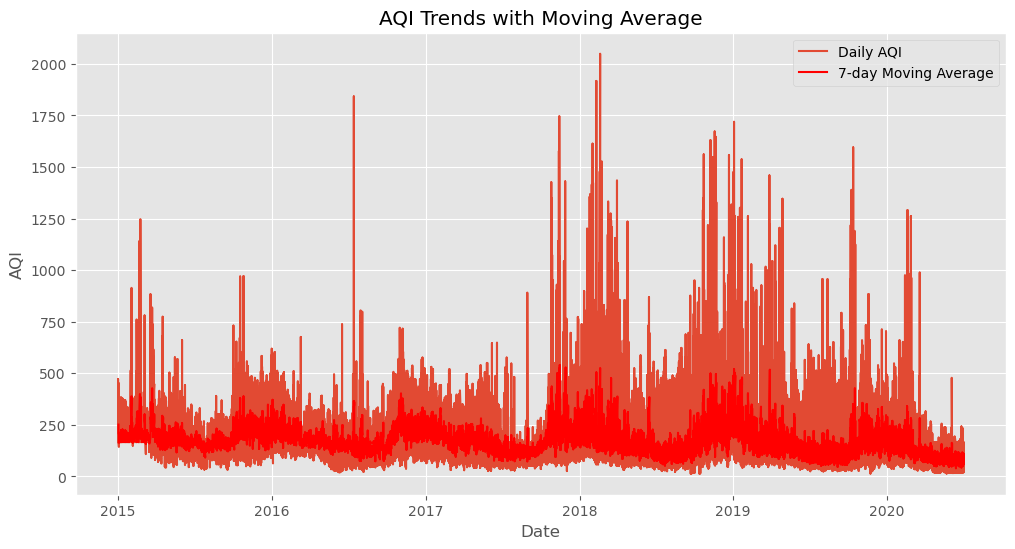

In [167]:


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Exploratory Data Analysis (EDA)

# Descriptive statistics for PM2.5, PM10, AQI
print("Descriptive Statistics:")
print(df[['PM2.5', 'PM10', 'AQI']].describe())

# Correlation Matrix
print("\nCorrelation Matrix:")
correlation = df[['PM2.5', 'PM10', 'AQI']].corr()
print(correlation)

# Histograms for PM2.5, PM10, AQI
df[['PM2.5', 'PM10', 'AQI']].hist(bins=20, edgecolor='black')
plt.suptitle('Distribution of Pollutants')
plt.xlabel('Pollutant Level')
plt.ylabel('Frequency')
plt.show()

# Time series plot for AQI
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['AQI'], label='Daily AQI')
plt.title('Time Series of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

# Scatter plot for relationships between variables (e.g., PM2.5 vs. AQI)
plt.figure(figsize=(8, 6))
plt.scatter(df['PM2.5'], df['AQI'], alpha=0.5)
plt.title('PM2.5 vs. AQI')
plt.xlabel('PM2.5 Level')
plt.ylabel('AQI')
plt.show()

# Trends over time using moving average
window_size = 7
df['AQI_rolling_avg'] = df['AQI'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['AQI'], label='Daily AQI')
plt.plot(df['date'], df['AQI_rolling_avg'], label='7-day Moving Average', color='red')
plt.title('AQI Trends with Moving Average')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()


Model Performance:
Mean Squared Error: 8488.460621435226
R-squared: 0.4582397065392776


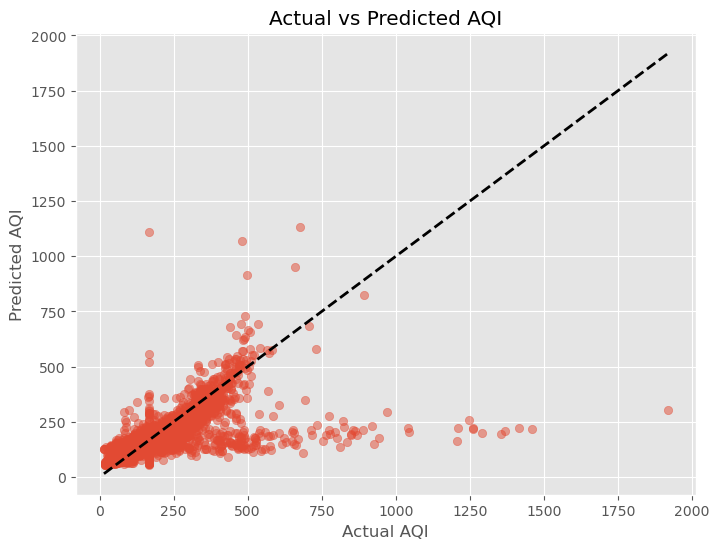

In [168]:
# AQI Prediction using Linear Regression

features = ['PM2.5', 'PM10']  
target = 'AQI'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

